In [ ]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import heappush, heappop
import numpy as np
from IPython.display import display, HTML
from heuristic import *
# Import des classes et fonctions du solveur
from algo_Astar import manhattan_distance, get_possible_swaps, a_star
from nodes import Node

In [6]:
def create_random_puzzle(size=4):
    """Crée un puzzle aléatoire de taille donnée"""
    numbers = list(range(1, size * size)) + [""]
    random.shuffle(numbers)
    return [numbers[i * size:(i + 1) * size] for i in range(size)]

def is_solvable(puzzle):
    """Vérifie si le puzzle est solvable"""
    # Aplatir le puzzle en ignorant la case vide
    flat = [x for row in puzzle for x in row if x != ""]
    
    # Compter les inversions
    inversions = 0
    for i in range(len(flat)):
        for j in range(i + 1, len(flat)):
            if flat[i] > flat[j]:
                inversions += 1
    
    # Trouver la position de la case vide depuis le bas
    n = len(puzzle)
    for i in range(n-1, -1, -1):
        for j in range(n):
            if puzzle[i][j] == "":
                blank_row_from_bottom = n - i

    # Pour un puzzle de taille paire
    if n % 2 == 0:
        return (inversions + blank_row_from_bottom) % 2 == 1
    # Pour un puzzle de taille impaire
    else:
        return inversions % 2 == 0

def generate_solvable_puzzle(size=4):
    """Génère un puzzle solvable de taille donnée"""
    while True:
        puzzle = create_random_puzzle(size)
        if is_solvable(puzzle):
            return puzzle

In [7]:
def test_solver(size=4, k_values=[0, 2, 3, 4, 5], num_puzzles=10):
    """
    Teste le solveur avec différentes valeurs de k sur plusieurs puzzles
    """
    results = []
    
    for k in k_values:
        print(f"\nTesting k={k}...")
        
        for i in range(num_puzzles):
            puzzle = generate_solvable_puzzle(size)
            
            start_time = time.time()
            solution = a_star(puzzle, k)
            end_time = time.time()
            
            results.append({
                'k': k,
                'puzzle_id': i,
                'solved': solution is not None,
                'time': end_time - start_time,
                'moves': len(solution) - 1 if solution else None,
            })
            
    return pd.DataFrame(results)


Testing k=1...

Testing k=2...

Testing k=3...

Testing k=4...

Testing k=5...


solved  time       moves      
    mean  mean   std  mean   std
k                               
1    1.0  0.14  0.29  14.8  2.62
2    1.0  0.13  0.11  23.5  2.46
3    1.0  0.19  0.22  27.6  3.24
4    1.0  1.56  4.04  31.0  3.02
5    1.0  0.35  0.42  31.4  1.58

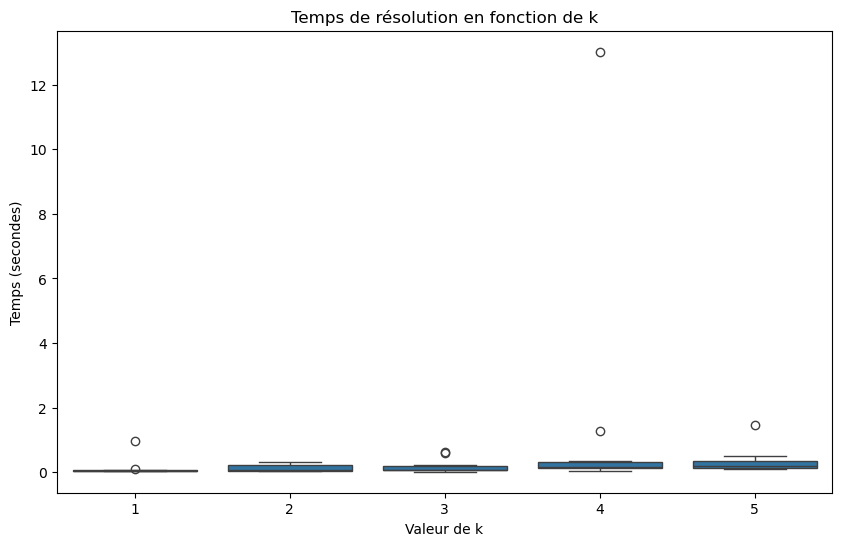

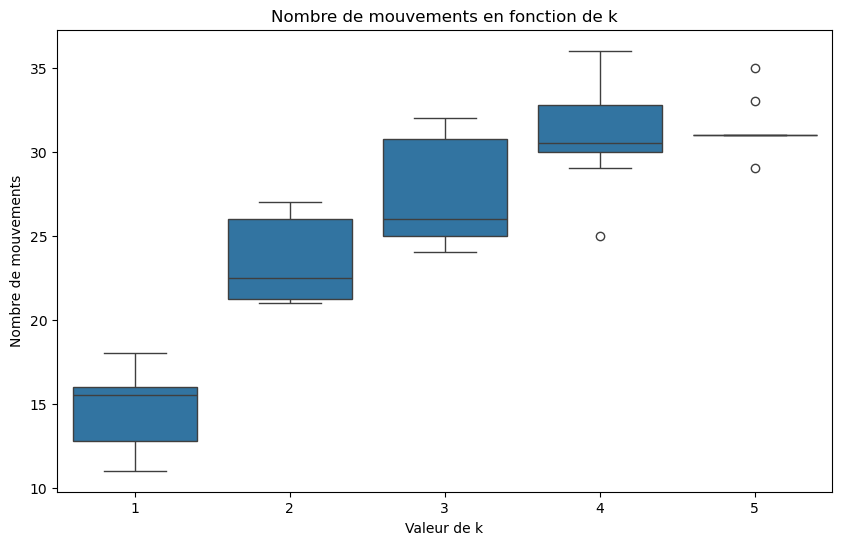

In [8]:
# Test avec différentes valeurs de k
k_values = [1, 2, 3, 4, 5]
results_df = test_solver(size=4, k_values=k_values, num_puzzles=10)

# Afficher les statistiques moyennes par valeur de k
stats_by_k = results_df.groupby('k').agg({
    'solved': 'mean',
    'time': ['mean', 'std'],
    'moves': ['mean', 'std']
}).round(2)

display(stats_by_k)

# Visualisation du temps de résolution moyen
plt.figure(figsize=(10, 6))
sns.boxplot(x='k', y='time', data=results_df)
plt.title('Temps de résolution en fonction de k')
plt.xlabel('Valeur de k')
plt.ylabel('Temps (secondes)')
plt.show()

# Visualisation du nombre de mouvements
plt.figure(figsize=(10, 6))
sns.boxplot(x='k', y='moves', data=results_df)
plt.title('Nombre de mouvements en fonction de k')
plt.xlabel('Valeur de k')
plt.ylabel('Nombre de mouvements')
plt.show()